# Census Income Project

In this project we have to buid a model to make prediction that if a person makes more than $50K a month or not.

## Loading Dataset

In [1]:
# importing libraries
import pandas as pd   # for data wrangling

import numpy as np    # numerical python to handle arrays

import matplotlib.pyplot as plt    # library for data visualisation

import seaborn as sns     # seaborn library for data visualisation

import warnings      # this will detect unnecessary warnings
warnings.filterwarnings('ignore')  # to ignore unnecessary warnings

In [2]:
# loading dataset in pandas dataframe
income = pd.read_csv('census_income.csv')

### Data Analysis

#### shape

In [3]:
# checking shape of data
income.shape

(32560, 15)

**The dataset contains 32560 rows and 15 clumns it is quite huge dataset.**

In [4]:
# let's load top 10 rows of data to take an overview of it
income.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


#### Data types

In [5]:
# let's check the data types of columns
income.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

**some column contains numeric while some contains object data types.**

#### Nan Values

In [6]:
# checking if there is any null value present in data
income.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

**There is not any null value present in data.**

#### Skewness

In [7]:
# let's check skewness of numerical columns
income.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

**From here we can see Capital gain contains highly positive skewed data and the other two columns contains too. But is it true we will check it during visualisation of data and handle them accordingly.**

#### Unique features of object data type columns

In [8]:
# making a list of all object data type columns

# we will use list concatenation to make the list
obj = [i for i in income.columns if income[i].dtypes == 'O']

In [9]:
# using for loop to see the number of unique values present in different columns
for i in obj:
    uni = income[i].nunique()
    print('There are', uni, 'unique values present in', i, 'column.')

There are 9 unique values present in Workclass column.
There are 16 unique values present in Education column.
There are 7 unique values present in Marital_status column.
There are 15 unique values present in Occupation column.
There are 6 unique values present in Relationship column.
There are 5 unique values present in Race column.
There are 2 unique values present in Sex column.
There are 42 unique values present in Native_country column.
There are 2 unique values present in Income column.


**Observation: Here every categorical column total number of unique value is shown.**

#### Statistical Summary

In [10]:
# checking summary statistics of numeric data
stats = income.describe()
stats

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Observations:
    
    1: The average age of people is 38
        
    2: In Capital_gain and Capital_loss column mean is greater than median means data is skewed.

In [11]:
# checking summary statistics of categorical column
obj_summary = income.describe(include=['O'])
obj_summary

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


#### Imbalance Check

In [12]:
income['Income'].value_counts(normalize = True)*100

 <=50K    75.918305
 >50K     24.081695
Name: Income, dtype: float64

**From here we can see there is two unique values present from which one is 75% and another is 25% this shows the imbalance in dataset. We need to handle this otherwise the model will be biased.**

### Data Visalisation

#### Distribution of numerical data

In [13]:
# first we will check the distribution of numeric data

# making a list of columns in which numeric features are present
numeric = [i for i in income.columns if income[i].dtypes != 'O']

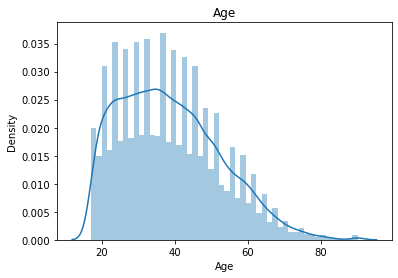

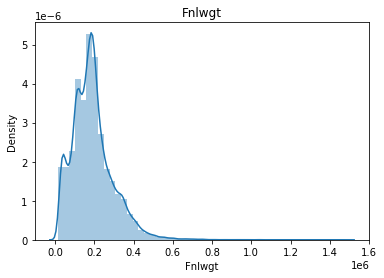

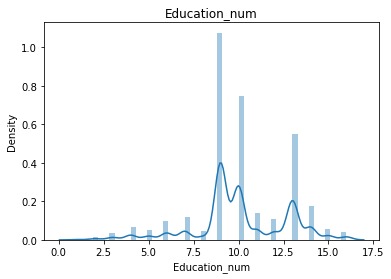

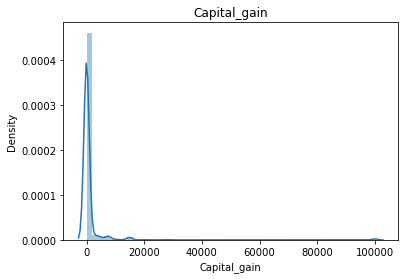

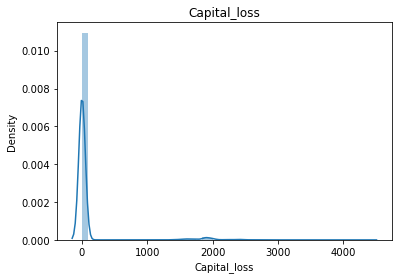

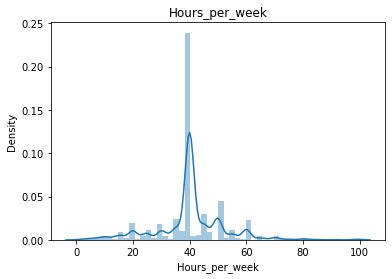

In [14]:
# now we will check the distribution of data
# we will use distplot for this
# we will use for loop to plot the graph
for i in numeric:
    plt.title(i)
    sns.distplot(income[i])
    plt.show()

**Observation: The data are highly skewed in all the columns.**

#### Outliers

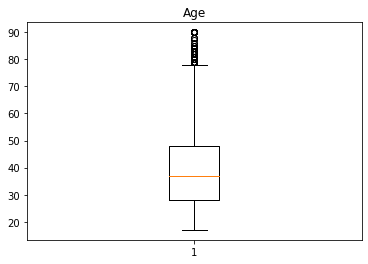

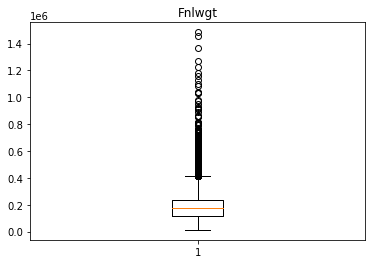

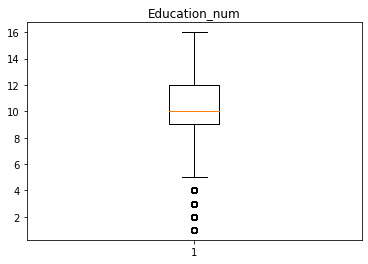

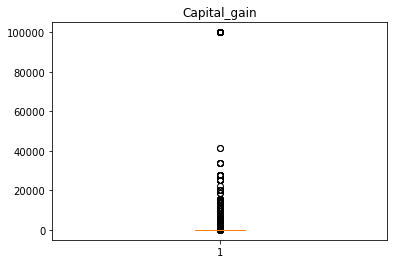

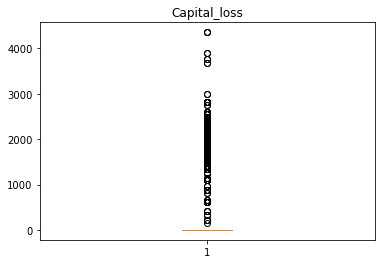

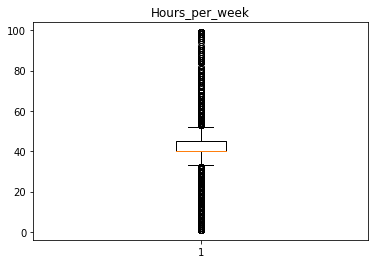

In [15]:
# we will use boxplot for this

# using for loop to plot graph
for i in numeric:
    plt.title(i)
    plt.boxplot(income[i])
    plt.show()

**Observation: We can see there are quite number of outliers are showing in some columns we will check for it further.**

#### Categorical columns visualisation

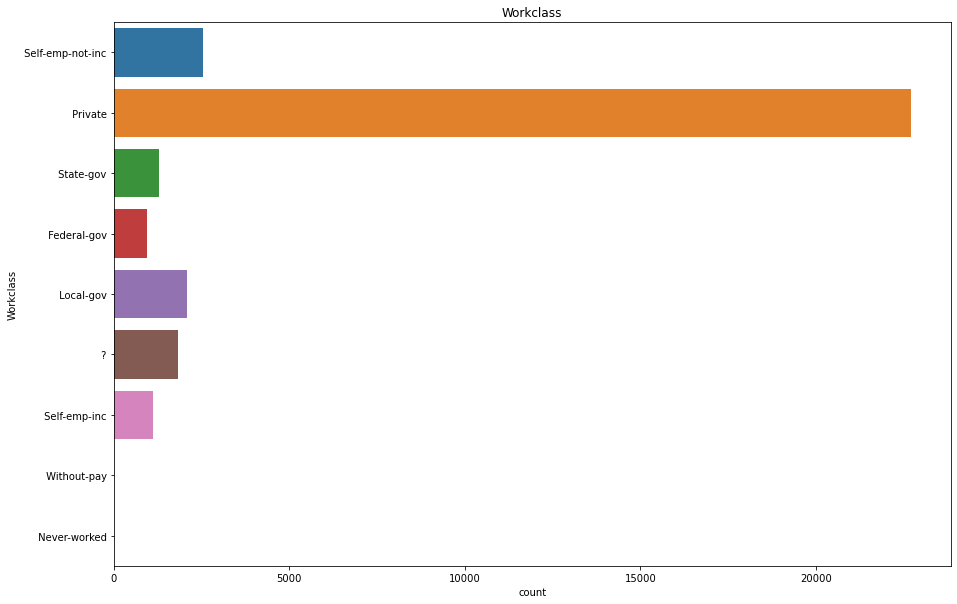

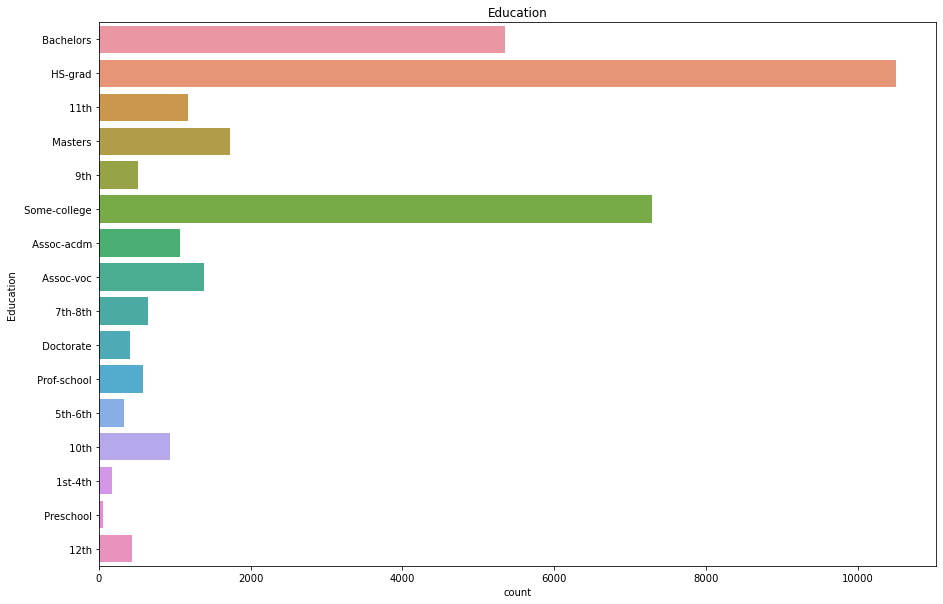

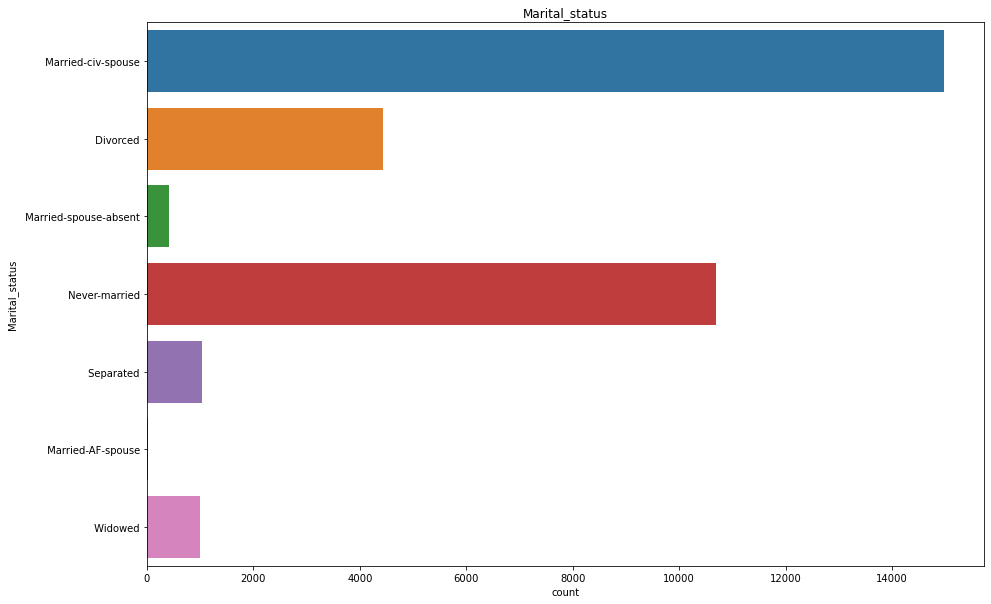

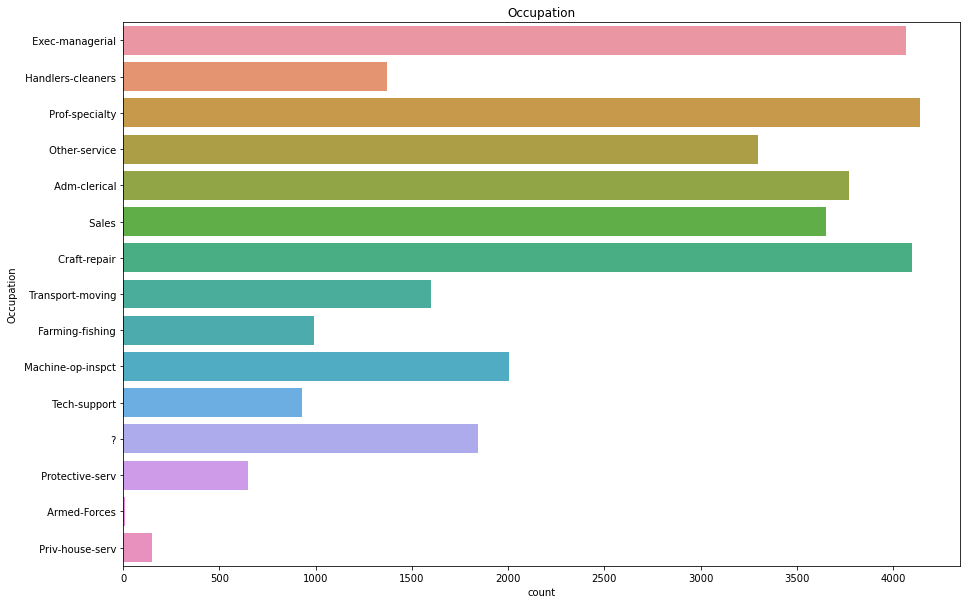

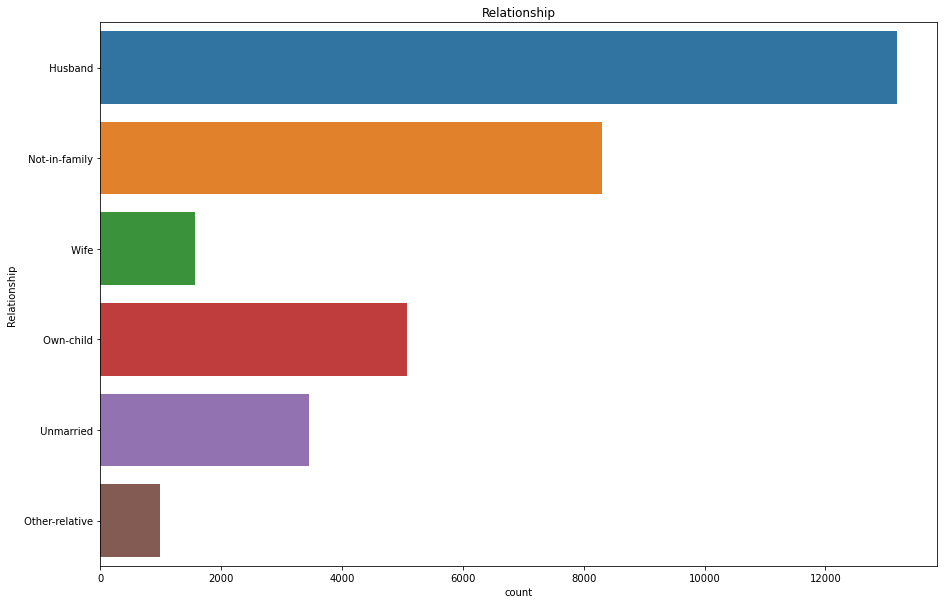

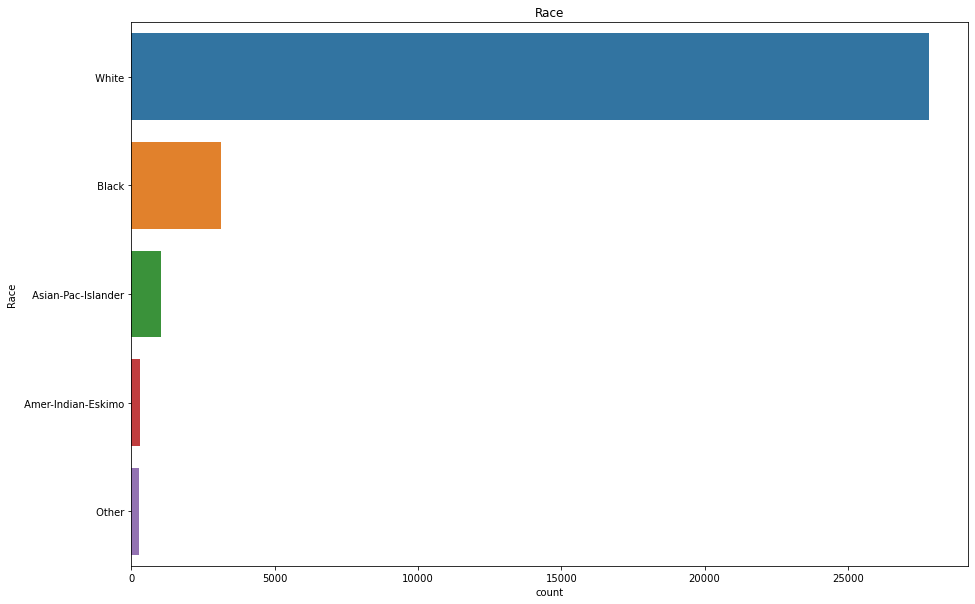

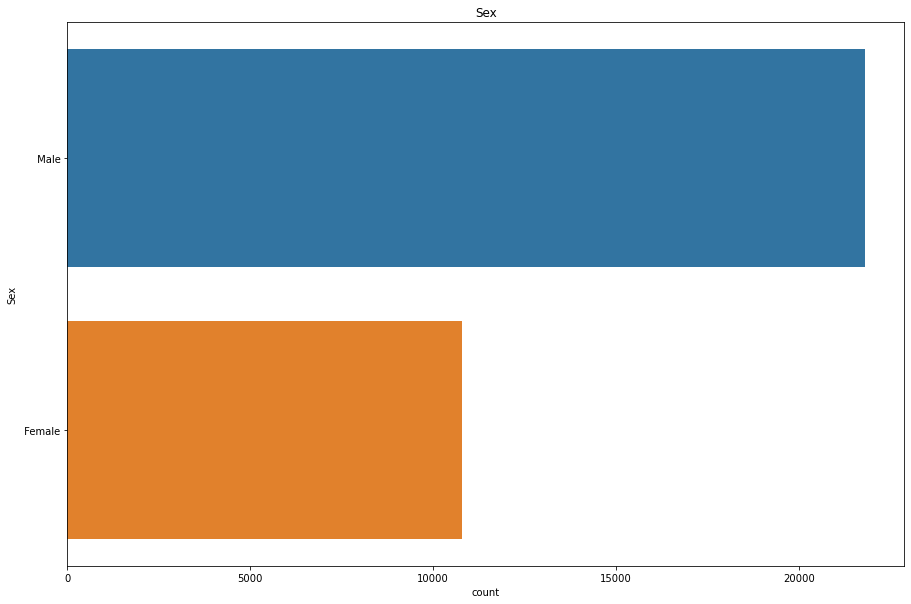

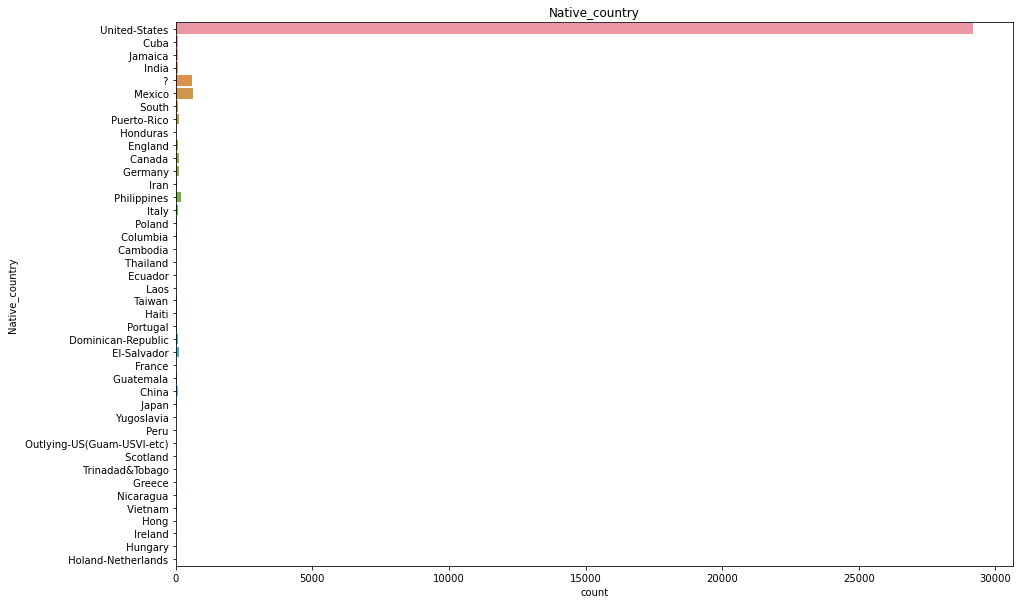

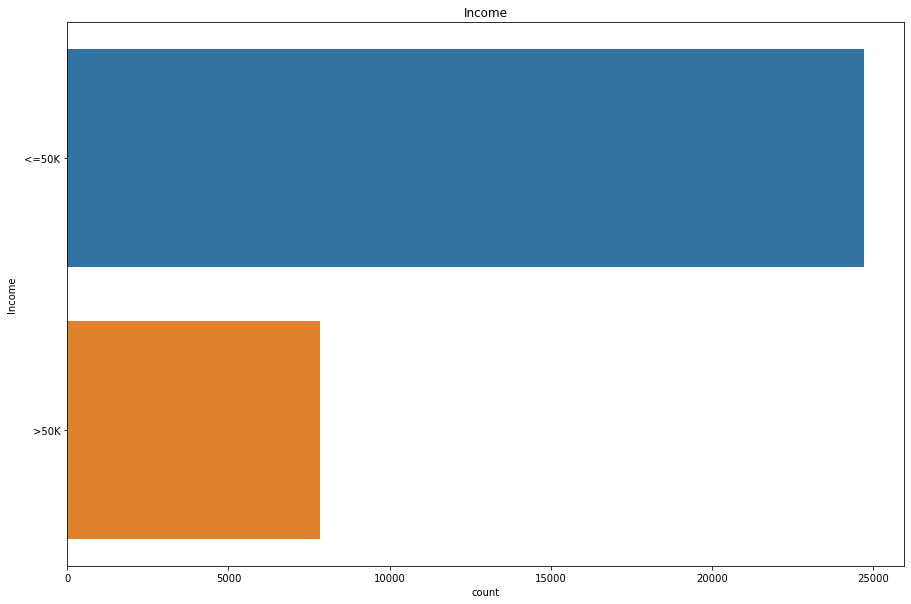

In [16]:
# we will use countplot for this

for i in obj:
    plt.figure(figsize = (15,10))
    plt.title(i)
    sns.countplot(y = income[i])
    plt.show()

Observations:
    
    1: Most people belongs from private work class
        
    2: Most of the people have some HS, college or Bachelors degree.
        
    3: Married people are more but also there are more number of peoples who never married.
        
    4: There are very few people in armed forces.
        
    5: Most number of people belongs from united nations.

#### Checking relation between numerical input and target column

Relationship between income and Age


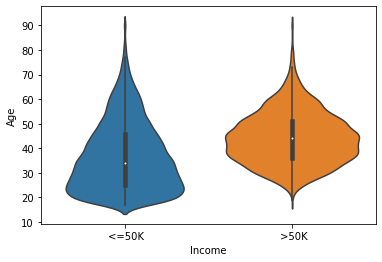



Relationship between income and Fnlwgt


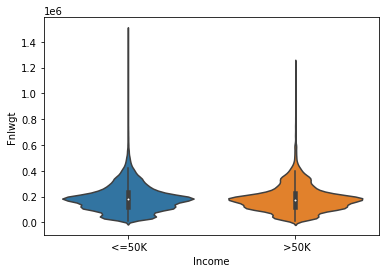



Relationship between income and Education_num


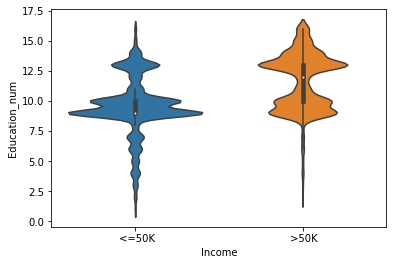



Relationship between income and Capital_gain


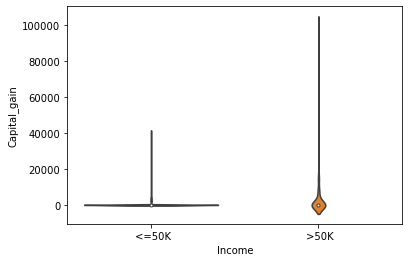



Relationship between income and Capital_loss


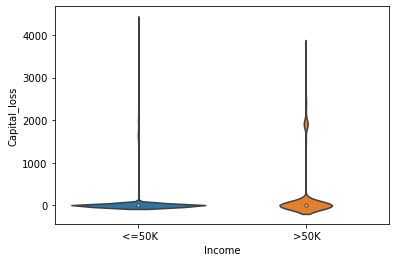



Relationship between income and Hours_per_week


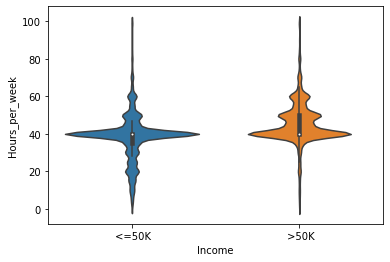

In [17]:
# We will use for loop to plot the graph
# we will use violinplot to show the relationship
for i in numeric:
    print('Relationship between income and', i)
    sns.violinplot(income['Income'], income[i])
    plt.show()
    print('\n')

Observations:
    
    1: Most number of people between 20 to 25 age group making less than $50K
        
    2: People of age group between 30 to 50 are making more than $50K.
        
    3: More people with education number around 12.5 are making more than $50K
        
    4: People working around 40 hours per week are making more than $50K but there are more people than them who works same         number of hours but not making more than $50K

#### Encoding

**First we will make a copy of the dataframe and then perform tasks on that copy.**

In [18]:
df = income.copy()

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [21]:
# now we will encode the categorical columns

# we will use for loop to encode the data
for i in obj:
    df[i] = le.fit_transform(df[i])

#### Correlation

Checking correlation of data with target column

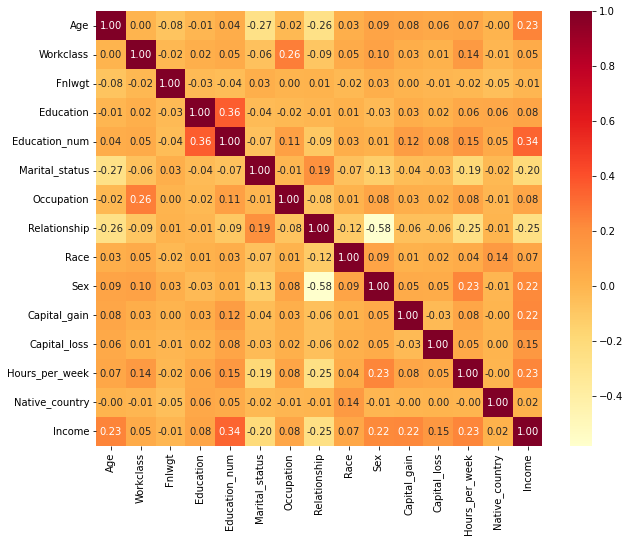

In [22]:
# we will use heatmap to check correlation
corr = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'YlOrRd')
plt.show()

Observations:
    
    1: Every columns except Relationship and Marital_status having positive correlation with income.
        
    2: Column Fnlwgthave about 0 correlation with income and as we know it is some id which is unique for every person so we can drop this column

#### Dropping column

In [23]:
df.drop('Fnlwgt', inplace = True, axis = 1)

#### Outliers

Let's check for outliers and handle them

In [24]:
# importing required library to calculate zscore
from scipy.stats import zscore

In [25]:
# finding zscore values of every data and storing it into a variable
z = np.abs(zscore(df))

In [26]:
# checking the data which zscore value is greater than 3
threshold = 3
out = np.where(z>threshold)

In [27]:
# holding array in a dataframe
outlier = pd.DataFrame(out)

# checking shape of outliers data
outlier.shape[1]

5320

In [28]:
# checking data loss if we delete the outliers
data_loss = ((32560-27240)/32560)*100
data_loss

16.33906633906634

**Here we can see there will be more than 10% data wil be lost if we remove the outliers so we will go with them.**

#### Over Sampling

In [29]:
# as we have seen the target column income is imbalanced so we need to balance that
# we will use oversampling technique to balance the dataset

# importing required library
from imblearn.over_sampling import SMOTE

# making instance of it
smt = SMOTE()

In [30]:
# now first we will take input and target column and hold them in x and y variables respectively
x = df.iloc[ : , :-1]
y = df.iloc[ : , -1]

In [31]:
# checking shape of input and target data shape
print('Input data shape:', x.shape)
print('Target data shape:', y.shape)

Input data shape: (32560, 13)
Target data shape: (32560,)


In [32]:
# sending data for balancing
in_x, out_y = smt.fit_resample(x,y)

In [33]:
# now checking shape of new balanced data
print('Input data shape:', in_x.shape)
print('Target data shape:', out_y.shape)

Input data shape: (49438, 13)
Target data shape: (49438,)


In [34]:
# checking total number of values of different features of target column
out_y.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

**Here we can see now the dataset is balanced.**

#### Skewness

In [35]:
# checking skewness of input data
in_x.skew().sort_values(ascending = False)

Capital_gain      8.089691
Capital_loss      3.758377
Relationship      1.175318
Age               0.377973
Marital_status    0.330424
Hours_per_week    0.258653
Occupation        0.078097
Education_num    -0.381700
Workclass        -0.798311
Education        -0.936754
Sex              -0.972812
Race             -2.589548
Native_country   -3.758581
dtype: float64

*Capital_gain column has very high skewness and some other columns too.*

In [36]:
# importing library to handle the distribution of data
from sklearn.preprocessing import PowerTransformer

In [37]:
# holding it into an instance
pt = PowerTransformer()

In [38]:
# passing input data to transform and holding the output into a variable
x1 = pt.fit_transform(in_x)

# as we know this will provide the output in numpy array format so making dataframe of it
x_in = pd.DataFrame(x1, columns = in_x.columns)

In [39]:
# checking skewness of new dataframe
x_in.skew()

Age              -0.026129
Workclass         0.092787
Education        -0.197242
Education_num    -0.013589
Marital_status    0.005155
Occupation       -0.182557
Relationship      0.392608
Race             -2.061231
Sex              -0.972812
Capital_gain      2.225136
Capital_loss      3.567749
Hours_per_week    0.253585
Native_country   -2.856113
dtype: float64

*We can see the skewness of data is now came in acceptable range*

#### Scaling of data

In [40]:
# we will use standard scaler to scale our data

# importing require library
from sklearn.preprocessing import StandardScaler

# holding it into an instance
ssc = StandardScaler()

In [41]:
# applying scaling to input data
scaled = ssc.fit_transform(x_in)

# this will give output in numpy array format 

# making pandas dataframe of output
input_x = pd.DataFrame(scaled, columns = x_in.columns)

*Now our data is ready to go for model training*

### Model Buliding

In [42]:
# importing classification algorithms and validation matrics

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
# making instance of every model
svc = SVC()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
gnb = GaussianNB()

#### Random State

In [46]:
# we will use for loop to check random state from 40 to 60
for i in range(40,60):
    x_train, x_test, y_train, y_test = train_test_split(input_x, out_y, test_size = 0.25, random_state = i )
    # taking 25% data for training
    
    # using random forest regressor model
    rfc.fit(x_train, y_train)
    
    # making prediction on test data
    pred = rfc.predict(x_test)
    
    # checking accuracy score
    acc = accuracy_score(pred, y_test)
    
    # printing accuracy scores at different random states
    print('Accuracy score is:', acc, 'at random state:', i)

Accuracy score is: 0.8839805825242718 at random state: 40
Accuracy score is: 0.885032362459547 at random state: 41
Accuracy score is: 0.8871359223300971 at random state: 42
Accuracy score is: 0.8810679611650486 at random state: 43
Accuracy score is: 0.8855987055016181 at random state: 44
Accuracy score is: 0.8861650485436893 at random state: 45
Accuracy score is: 0.8858414239482201 at random state: 46
Accuracy score is: 0.8860032362459547 at random state: 47
Accuracy score is: 0.8858414239482201 at random state: 48
Accuracy score is: 0.8822006472491909 at random state: 49
Accuracy score is: 0.8857605177993527 at random state: 50
Accuracy score is: 0.8822006472491909 at random state: 51
Accuracy score is: 0.8852750809061488 at random state: 52
Accuracy score is: 0.8888349514563106 at random state: 53
Accuracy score is: 0.8833333333333333 at random state: 54
Accuracy score is: 0.8821197411003237 at random state: 55
Accuracy score is: 0.8865695792880259 at random state: 56
Accuracy score 

*Here we can see this is showing quite similar accuracy at different random states we will take random state 53 to split our data.*

#### Data splitting

In [47]:
# splitting the data at random state 53
x_train, x_test, y_train, y_test = train_test_split(input_x, out_y, test_size = 0.25, random_state = 53)

In [48]:
# checking testing and training data shape
print('Input training data shape:', x_train.shape)
print('Target training data shape:', y_train.shape)
print('Input test data shape:', x_test.shape)
print('Target test data shape:', y_test.shape)

Input training data shape: (37078, 13)
Target training data shape: (37078,)
Input test data shape: (12360, 13)
Target test data shape: (12360,)


#### Selecting a model

In [49]:
# Now we will train different classification models and check the accuracy score of all models then select the best model

# making a list of all models
model = [svc, dtc, knn, rfc, gnb]

# using for loop to train all models

for model in model:
    model.fit(x_train, y_train)
    
    # making predictions
    pred = model.predict(x_test)
    
    # checking accuracy score
    accuracy = accuracy_score(pred, y_test)
    
    # confusion matrix
    cnf_matrix = confusion_matrix(pred, y_test)
    
    # classification report
    clf_report = classification_report(pred, y_test)
    
    print('Evaluation of model', model,':')
    print('Accuracy score:', accuracy)
    print('Confusion matrix:\n', cnf_matrix)
    print('Classification report\n', clf_report)
    print('\n\n')

Evaluation of model SVC() :
Accuracy score: 0.8364077669902913
Confusion matrix:
 [[4871  657]
 [1365 5467]]
Classification report
               precision    recall  f1-score   support

           0       0.78      0.88      0.83      5528
           1       0.89      0.80      0.84      6832

    accuracy                           0.84     12360
   macro avg       0.84      0.84      0.84     12360
weighted avg       0.84      0.84      0.84     12360




Evaluation of model DecisionTreeClassifier() :
Accuracy score: 0.8535598705501618
Confusion matrix:
 [[5255  829]
 [ 981 5295]]
Classification report
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      6084
           1       0.86      0.84      0.85      6276

    accuracy                           0.85     12360
   macro avg       0.85      0.85      0.85     12360
weighted avg       0.85      0.85      0.85     12360




Evaluation of model KNeighborsClassifier() :
Accuracy sco

**From here we can see all models are performing quite well except GaussianNB but from them RandomForestClassifier is performing with highest accuracy so we will select that as final model.**

#### Final model training

In [50]:
# sending data to the best model for training
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [51]:
# making predictions on test data
pred = rfc.predict(x_test)

In [52]:
# checking accuracy score
print('Accuracy score:', accuracy_score(pred, y_test))

Accuracy score: 0.8909385113268609


*Model accuracy is 89%*.

In [53]:
# checking confusion matrix
print('Confusion matrix:\n', confusion_matrix(pred, y_test))

Confusion matrix:
 [[5451  563]
 [ 785 5561]]


*There are quite values are in place of false positive and false negative place as we know the model accuracy is 89% so it will happen*

In [55]:
# checking cassification report
print('Classification report:\n', classification_report(pred, y_test))

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      6014
           1       0.91      0.88      0.89      6346

    accuracy                           0.89     12360
   macro avg       0.89      0.89      0.89     12360
weighted avg       0.89      0.89      0.89     12360



*Overall model accuracy is 89%.*

### Model Evaluation

#### Cross Validation

In [56]:
# importing required model
from sklearn.model_selection import cross_val_score

In [57]:
# using for loop to split data at different cross folds
for i in range(2,20):
    score = cross_val_score(rfc, input_x, out_y, cv = i )
    mean_score = score.mean()
    print('At cross fold', i,'mean score is', mean_score)

At cross fold 2 mean score is 0.8755208544034954
At cross fold 3 mean score is 0.8801335354047742
At cross fold 4 mean score is 0.8846847324552343
At cross fold 5 mean score is 0.8858579210450255
At cross fold 6 mean score is 0.8880423898531374
At cross fold 7 mean score is 0.8873551648695513
At cross fold 8 mean score is 0.8890132520317539
At cross fold 9 mean score is 0.8886696160912391
At cross fold 10 mean score is 0.8887098603693759
At cross fold 11 mean score is 0.8892179471618725
At cross fold 12 mean score is 0.8898628415873712
At cross fold 13 mean score is 0.8905906224706008
At cross fold 14 mean score is 0.890472905269531
At cross fold 15 mean score is 0.890509991111373
At cross fold 16 mean score is 0.8899234717931149
At cross fold 17 mean score is 0.8910170108302574
At cross fold 18 mean score is 0.8911197760921529
At cross fold 19 mean score is 0.890570006877301


**Here we can see there is not much difference between the accuracy score of model and cross validation score both are quite similar so we can say the model is neither underfitting nor overfitting.**

#### Hyperparameter tuning

Let's do hyperparameter tuning and check if the model performance improves.

In [58]:
# importing required library
from sklearn.model_selection import GridSearchCV

In [59]:
# making a dictionary of parameters
params = {'n_estimators':[100,200,300,400,500], 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2']}

# making instance for tuning and passing model and parameters
gsv = GridSearchCV(rfc, params)

In [60]:
# sending data for training at different parameters
gsv.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [61]:
# finding best parameter and that accuracy
print('Best Parameter:', gsv.best_params_)
print('Best score:', gsv.best_score_)

Best Parameter: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 500}
Best score: 0.8807381354015046


**Here we can see the model best score at best parameters is 88% but it is giving 89% accuracy default so we will save that model.**

#### AUC_ROC Curve

In [69]:
# importing required libraries for it
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [70]:
# using predict_proba function for model RandomForestClassifier to predict the occurance of 1
y_pred_prob = rfc.predict_proba(x_test)[:,1]

In [71]:
# now we will use these predicted probability to find fpr (false positive rate), tpr (True Positive rate) and threshold values

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

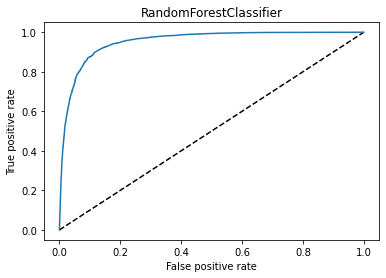

In [72]:
# making auc_roc curve
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.title('RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

Here Area under the curve showing the ROC. The graph is not straight because the accuracy is about 89%.

In [74]:
# checking roc_score
score = roc_auc_score(y_test, rfc.predict(x_test))
score

0.8910923237483707

### Saving the best model

In [62]:
# importing library
import joblib

In [63]:
joblib.dump(rfc, 'income_predictor.obj')

['income_predictor.obj']

### Loading model

In [65]:
income = joblib.load('income_predictor.obj')

In [66]:
# making prediction on test data
pred = income.predict(x_test)

In [67]:
accuracy = accuracy_score(pred, y_test)
accuracy

0.8909385113268609

*Here we can see model is giving 89% accuracy.*

In [68]:
# making dataframe of predictions
pd.DataFrame([income.predict(x_test)[:], y_test[:]],index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,...,12350,12351,12352,12353,12354,12355,12356,12357,12358,12359
Predicted,1,1,0,1,0,0,1,1,0,0,...,1,1,1,0,1,1,1,0,1,0
Original,1,1,0,0,0,1,1,0,0,0,...,1,1,0,0,1,0,1,0,0,0


**Here we can see the model is making quiet good predictions.**